In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import time
plt.style.use("classic")

Importing a sample image to work with

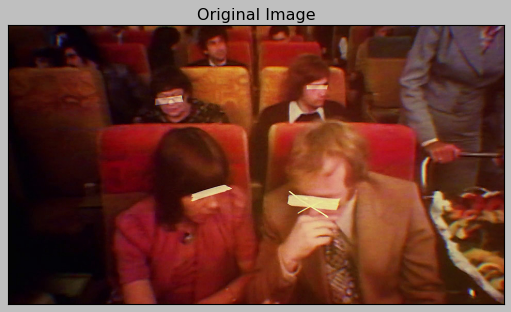

In [2]:
narcos = cv2.imread("narcos.jpg")
narcos = cv2.cvtColor(narcos,cv2.COLOR_BGR2RGB)
plt.imshow(narcos)
plt.xticks([])
plt.yticks([])
plt.title("Original Image")
plt.show()

Below is the process of applying kernel on every object.
We try doing this the generic way and find the time it takes to compute a sample problem

In [3]:
def masker_rgb(img,kernel):
    img_ = np.zeros(img.shape)
    kx,ky = kernel.shape
    kx,ky = int(kx/2),int(ky/2)
    for ch in range(3):
        for i in range(kx,img.shape[0]-kx):
            for j in range(ky,img.shape[1]-ky):
                select = img[i-kx:i+kx+1,j-ky:j+ky+1,ch]
                img_[i][j][ch] = np.sum(kernel * select)
    return img_.astype(int)
img = narcos.copy()
kernel = np.ones([9,9])/81
st = time.time()
new_img = masker_rgb(img.copy(),kernel)
et = time.time()
print("Time taken to mask => ",et-st)

Time taken to mask =>  9.123876333236694


In [4]:
#Decorator to calculate the time to finish the function
def calculate_time(func):
    def inner_function(*args, **kwargs):
        begin = time.time()
        img_ = func(*args,**kwargs)
        end = time.time()
        print("Total Time taken = ",end-begin)
        return img_
    return inner_function

What this function does is, It just takes an RGB image and the kernel in arguments and performs this operation
$$P_{x,y} = \sum\begin{bmatrix} a_{x-1,y-1} & a_{x-1,y} & a_{x-1,y+1} \\ a_{x,y-1} & a_{x,y} & a_{x,y+1} \\ a_{x+1,y-1} & a_{x+1,y} & a_{x+1,y+1}\end{bmatrix} \cdot \begin{bmatrix} k_1 & k_2 & k_3 \\ k_4 & k_5 & k_6 \\ k_7 & k_8 & k_9\end{bmatrix}$$

In [5]:
@calculate_time
@jit
def masker_rgb(img,kernel):
    img_ = np.zeros(img.shape)
    kx,ky = kernel.shape
    kx,ky = int(kx/2),int(ky/2)
    for ch in range(3):
        for i in range(kx,img.shape[0]-kx):
            for j in range(ky,img.shape[1]-ky):
                #select = np.array([[img[i-1][j-1][ch],img[i-1][j][ch],img[i-1][j+1][ch]],
                                  #[img[i][j-1][ch],img[i][j][ch],img[i][j+1][ch]],
                                  #[img[i+1][j-1][ch],img[i+1][j][ch],img[i+1][j+1][ch]]])
                select = img[i-kx:i+kx+1,j-ky:j+ky+1,ch]
                img_[i][j][ch] = np.sum(kernel * select)
    return img_.astype(int)


<ipython-input-5-c5dc5dd181be>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "masker_rgb" failed type inference due to: Invalid use of BoundFunction(array.astype for array(float64, 3d, C)) with parameters (Function(<class 'int'>))

During: resolving callee type: BoundFunction(array.astype for array(float64, 3d, C))
During: typing of call at <ipython-input-5-c5dc5dd181be> (15)


File "<ipython-input-5-c5dc5dd181be>", line 15:
def masker_rgb(img,kernel):
    <source elided>
                img_[i][j][ch] = np.sum(kernel * select)
    return img_.astype(int)
    ^

  @calculate_time
<ipython-input-5-c5dc5dd181be>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "masker_rgb" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-5-c5dc5dd181be>", line 7:
def masker_rgb(img,kernel):
    <source elided>
    kx

Total Time taken =  3.257554054260254
Total Time taken =  0.19150876998901367


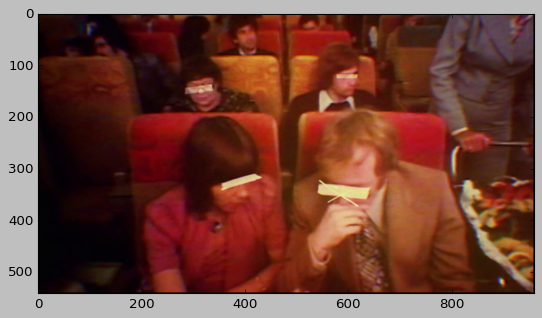

In [6]:
img = narcos.copy()
kernel = np.ones([3,3])/9
new_img = masker_rgb(img.copy(),kernel)
new_img = masker_rgb(img.copy(),kernel)
plt.imshow(new_img)
plt.show()

Kernel Matrix used here is $$K = \begin{bmatrix} 0 & -1 & 0 \\ -1 & 4 & -1 \\ 0 & -1 & 0\end{bmatrix}$$

Kernel is 
 [[  0 -10   0]
 [-10  40 -10]
 [  0 -10   0]]


<ipython-input-5-c5dc5dd181be>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "masker_rgb" failed type inference due to: Invalid use of BoundFunction(array.astype for array(float64, 3d, C)) with parameters (Function(<class 'int'>))

During: resolving callee type: BoundFunction(array.astype for array(float64, 3d, C))
During: typing of call at <ipython-input-5-c5dc5dd181be> (15)


File "<ipython-input-5-c5dc5dd181be>", line 15:
def masker_rgb(img,kernel):
    <source elided>
                img_[i][j][ch] = np.sum(kernel * select)
    return img_.astype(int)
    ^

  @calculate_time
<ipython-input-5-c5dc5dd181be>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "masker_rgb" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-5-c5dc5dd181be>", line 7:
def masker_rgb(img,kernel):
    <source elided>
    kx

Total Time taken =  1.4153919219970703


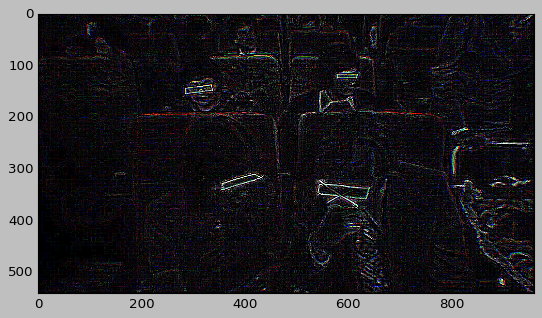

In [7]:
kernel = np.array([[0,-1,0],
                      [-1,4,-1],
                      [0,-1,0]])*10
print('Kernel is \n',kernel)
new_img = masker_rgb(img.copy(),kernel)
plt.imshow(new_img)
plt.show()

Trying various size of kernel and observing the effects of it.</br>$$Size = [k_3,k_9,k_{15}]$$
Since it is a avergaing filter, $$Value\ of\  each\ Pixel = \frac{1}{Total\ number\ of\ Pixels}$$

Kernel is of size  (3, 3)
Total Time taken =  0.20925688743591309


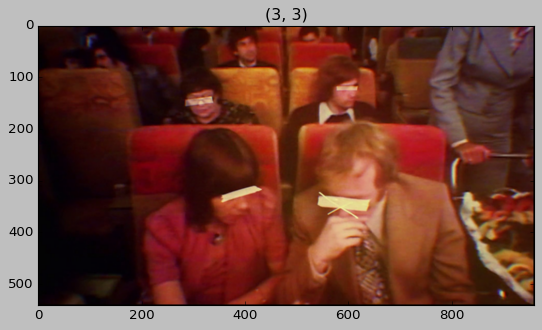

Kernel is of size  (9, 9)
Total Time taken =  0.5348238945007324


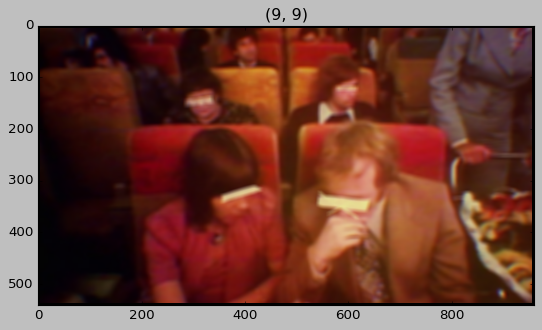

Kernel is of size  (15, 15)
Total Time taken =  1.1419315338134766


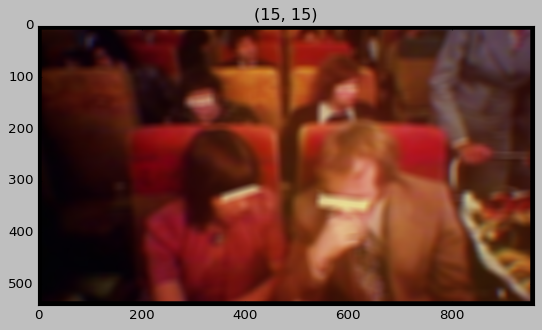

In [8]:
k3,k9,k15 = np.ones([3,3])/9,np.ones([9,9])/81,np.ones([15,15])/15**2
for k in [k3,k9,k15]:
    print('Kernel is of size ',k.shape)
    new_img = masker_rgb(img.copy(),k)
    plt.imshow(new_img)
    plt.title(str(k.shape))
    plt.show()

## Filtering using Median
$$P_{x,y} = Median\begin{pmatrix} a_{x-1,y-1} & a_{x-1,y} & a_{x-1,y+1} \\ a_{x,y-1} & a_{x,y} & a_{x,y+1} \\ a_{x+1,y-1} & a_{x+1,y} & a_{x+1,y+1}\end{pmatrix}$$

In [9]:
kernel = lambda n: np.ones([n,n])

In [10]:
@calculate_time
@jit
def filtering_median(img,kernel):    
    img_ = np.zeros(img.shape)
    kx,ky = kernel.shape
    kx,ky = int(kx/2),int(ky/2)
    for ch in range(3):
        for i in range(kx,img.shape[0]-kx):
            for j in range(ky,img.shape[1]-ky):
                #select = np.array([[img[i-1][j-1][ch],img[i-1][j][ch],img[i-1][j+1][ch]],
                                  #[img[i][j-1][ch],img[i][j][ch],img[i][j+1][ch]],
                                  #[img[i+1][j-1][ch],img[i+1][j][ch],img[i+1][j+1][ch]]])
                select = img[i-kx:i+kx+1,j-ky:j+ky+1,ch]
                img_[i][j][ch] = np.median(select)
    return img_.astype(int)

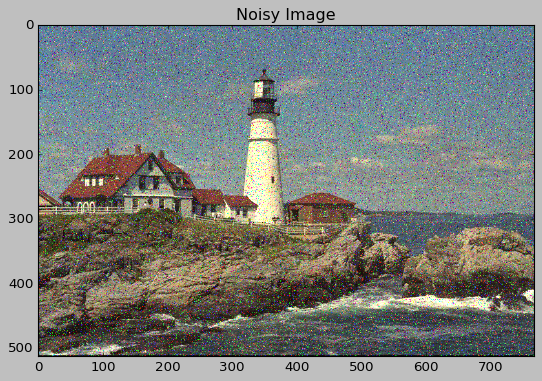

In [11]:
lighthouse = cv2.imread('lighthouse_noisy.png')
lighthouse = cv2.cvtColor(lighthouse,cv2.COLOR_BGR2RGB)
plt.imshow(lighthouse)
plt.title("Noisy Image")
plt.show()

<ipython-input-10-ce6eb5fc3b9b>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "filtering_median" failed type inference due to: Invalid use of BoundFunction(array.astype for array(float64, 3d, C)) with parameters (Function(<class 'int'>))

During: resolving callee type: BoundFunction(array.astype for array(float64, 3d, C))
During: typing of call at <ipython-input-10-ce6eb5fc3b9b> (15)


File "<ipython-input-10-ce6eb5fc3b9b>", line 15:
def filtering_median(img,kernel):    
    <source elided>
                img_[i][j][ch] = np.median(select)
    return img_.astype(int)
    ^

  @calculate_time
<ipython-input-10-ce6eb5fc3b9b>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "filtering_median" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-10-ce6eb5fc3b9b>", line 7:
def filtering_median(img,kernel):

Total Time taken =  2.356865406036377


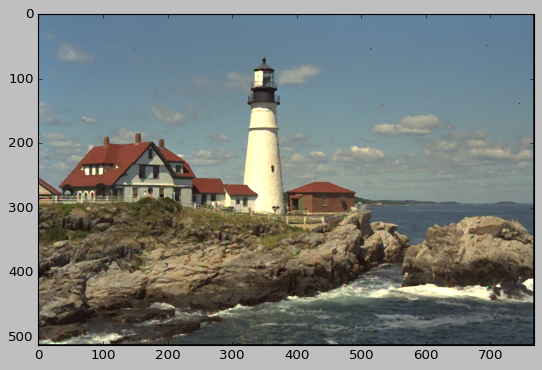

In [12]:
filtered_img = filtering_median(lighthouse,kernel(3))
plt.imshow(filtered_img)
plt.show()

## Viewing Image as a Signal

In [13]:
import scipy.signal as signal
import scipy.fft as fft

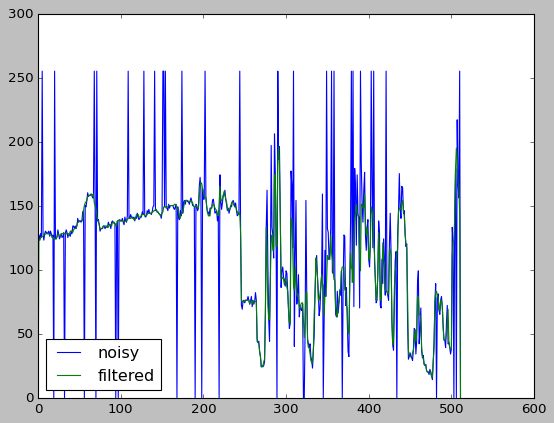

In [14]:
noisy_sig = lighthouse[:,50,1]
filtered_sig = filtered_img[:,50,1]
plt.plot(np.arange(len(noisy_sig)),noisy_sig,label="noisy")
plt.plot(np.arange(len(filtered_sig)),filtered_sig,label='filtered')
plt.legend(loc=0)
plt.show()

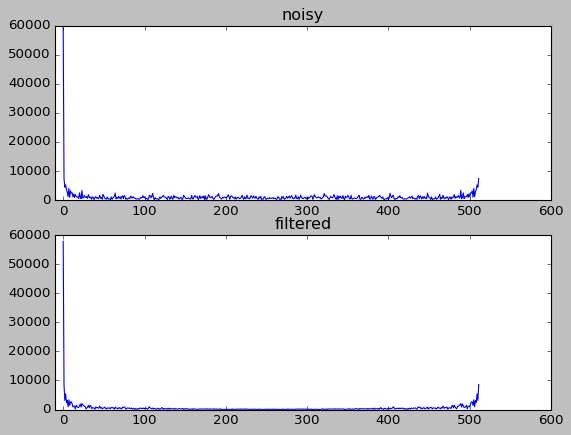

In [15]:
noisy_fft = np.abs(fft.fft(noisy_sig))
filtered_fft = np.abs(fft.fft(filtered_sig))
plt.subplot(2,1,1)
plt.plot(np.arange(len(noisy_fft)),noisy_fft)
plt.title("noisy")
plt.xlim(-10)
plt.subplot(2,1,2)
plt.plot(np.arange(len(filtered_fft)),filtered_fft)
plt.title('filtered')
plt.xlim(-10)
plt.show()

Coeff of highest frequncy =  7676.520215774232


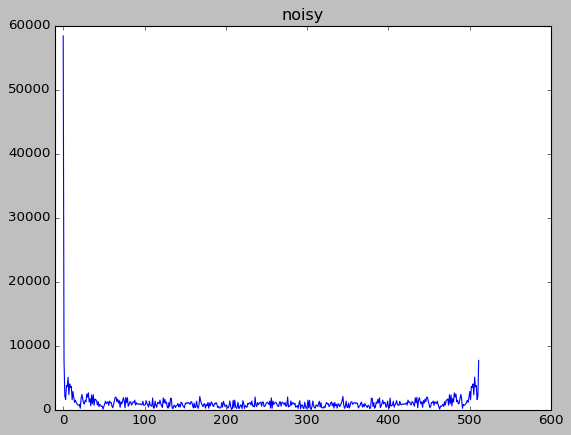

Total Time taken =  0.3271028995513916
Coeff of highest frequncy =  7840.0006791377955


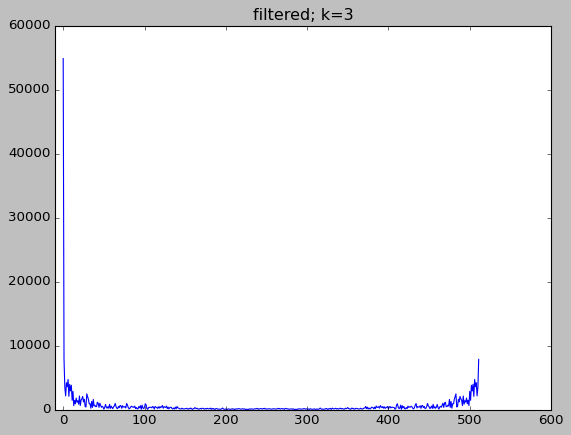

Total Time taken =  0.9050838947296143
Coeff of highest frequncy =  8012.70327220061


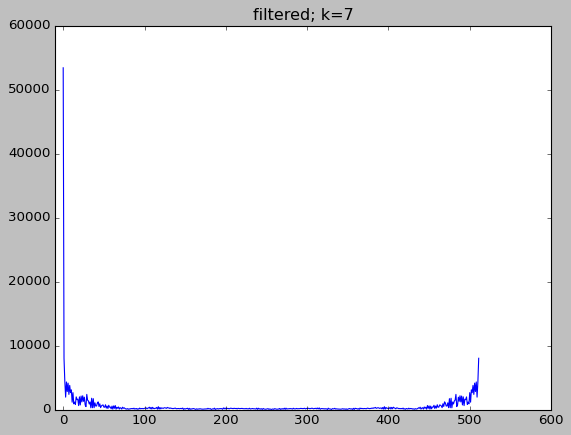

Total Time taken =  1.7727630138397217
Coeff of highest frequncy =  8010.363792614656


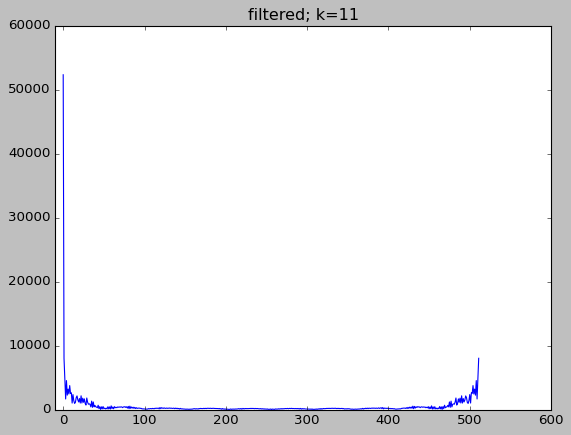

In [16]:
s=100
noisy_sig = lighthouse[:,s,1]
noisy_fft = np.abs(fft.fft(noisy_sig))
print("Coeff of highest frequncy = ",noisy_fft[-1])
plt.plot(np.arange(len(noisy_fft)),noisy_fft)
plt.title("noisy")
plt.xlim(-10)
plt.show()

for k_size in range(3,14,4):
    filtered_img = filtering_median(lighthouse,kernel(k_size))
    filtered_sig = filtered_img[:,s,1]
    filtered_fft = np.abs(fft.fft(filtered_sig))
    print("Coeff of highest frequncy = ",filtered_fft[-1])
    plt.plot(np.arange(len(filtered_fft)),filtered_fft)
    plt.title('filtered; k='+str(k_size))
    plt.xlim(-10)
    plt.show()

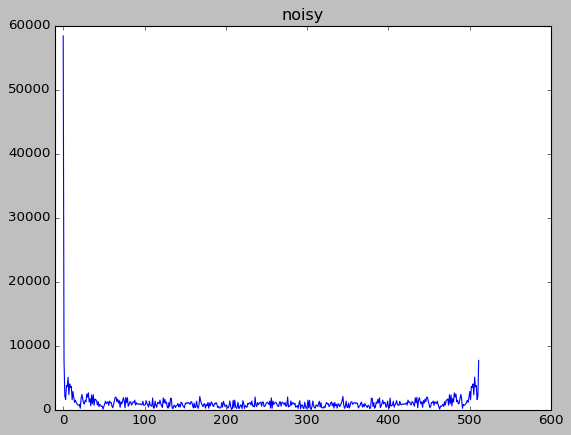

Total Time taken =  0.14209842681884766
Coeff of highest frequncy =  6688.079138259193


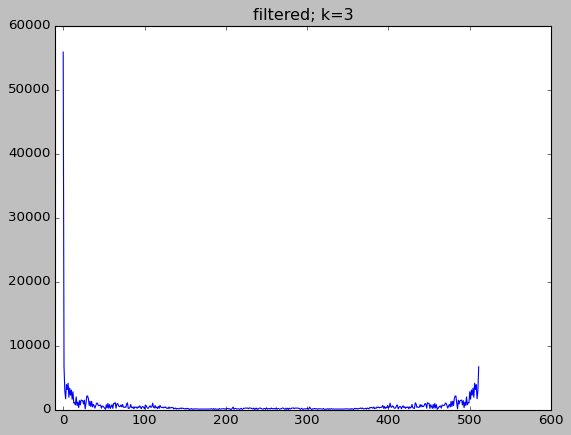

Total Time taken =  0.2872307300567627
Coeff of highest frequncy =  6766.512867542576


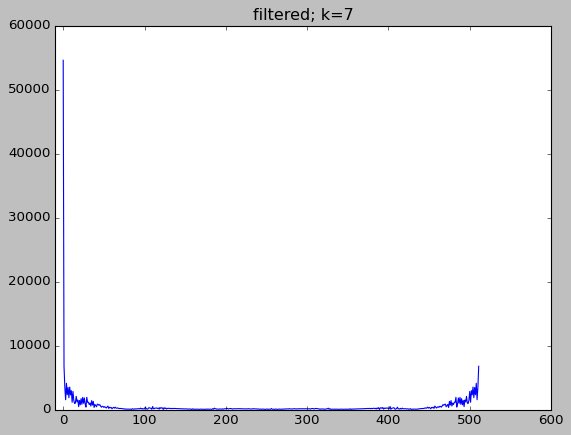

Total Time taken =  0.5539391040802002
Coeff of highest frequncy =  6647.837462635957


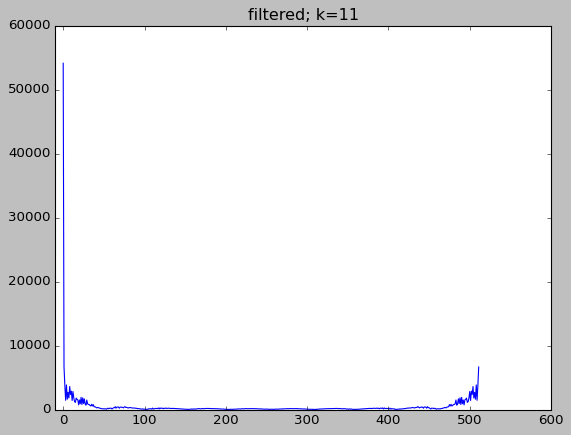

In [17]:
#Just taking avg, - useless
s=100
noisy_sig = lighthouse[:,s,1]
noisy_fft = np.abs(fft.fft(noisy_sig))
plt.plot(np.arange(len(noisy_fft)),noisy_fft)
plt.title("noisy")
plt.xlim(-10)
plt.show()

for k_size in range(3,14,4):
    filtered_img = masker_rgb(lighthouse,kernel(k_size)/k_size**2)
    filtered_sig = filtered_img[:,s,1]
    filtered_fft = np.abs(fft.fft(filtered_sig))
    print("Coeff of highest frequncy = ",filtered_fft[-1])
    plt.plot(np.arange(len(filtered_fft)),filtered_fft)
    plt.title('filtered; k='+str(k_size))
    plt.xlim(-10)
    plt.show()

### Edge Enhancement

In [29]:
@calculate_time
@jit
def masker_gray(img,kernel):
    img_ = np.zeros(img.shape)
    kx,ky = kernel.shape
    kx,ky = int(kx/2),int(ky/2)
    for i in range(kx,img.shape[0]-kx):
        for j in range(ky,img.shape[1]-ky):
                #select = np.array([[img[i-1][j-1][ch],img[i-1][j][ch],img[i-1][j+1][ch]],
                                  #[img[i][j-1][ch],img[i][j][ch],img[i][j+1][ch]],
                                  #[img[i+1][j-1][ch],img[i+1][j][ch],img[i+1][j+1][ch]]])
            select = img[i-kx:i+kx+1,j-ky:j+ky+1]
            img_[i][j] = np.sum(kernel * select)
    return img_.astype(int)


In [51]:
sobel = np.array([[1,-2,1],[-2,0,-2],[1,-2,1]])
sobel

array([[ 1, -2,  1],
       [-2,  0, -2],
       [ 1, -2,  1]])

Total Time taken =  0.11948204040527344


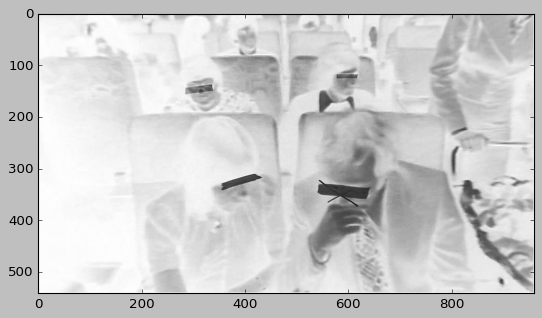

In [52]:
narcos_gray = cv2.cvtColor(narcos,cv2.COLOR_BGR2GRAY)
plt.imshow(masker_gray(narcos_gray.copy(),sobel),cmap="gray")